# Compare 2F, 2C, CHAOS MMA model values for one day - 01/01/2016


In [1]:
from viresclient import SwarmRequest
import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
%matplotlib inline

request = SwarmRequest(url="https://staging.viresdisc.vires.services/openows")
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC", "F"],
                     models=["MCO_SHA_2C", "MCO_SHA_2F",
                             "MMA_SHA_2C-Primary", "MMA_SHA_2C-Secondary",
                             "MMA_SHA_2F-Primary", "MMA_SHA_2F-Secondary",
                             "CHAOS-6-Core", "CHAOS-6-MMA-Primary", "CHAOS-6-MMA-Secondary",],
                     sampling_step="PT1S")

ds_20160101 = request.get_between(start_time=dt.datetime(2016,1,1),
                                  end_time=dt.datetime(2016,1,2)).as_xarray()
ds = ds_20160101.copy()
ds

[1/1] Processing:  100%|██████████|  [ Elapsed: 01:14, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (30.513MB)


<xarray.Dataset>
Dimensions:                      (Timestamp: 86400, dim: 3)
Coordinates:
  * Timestamp                    (Timestamp) datetime64[ns] 2016-01-01 ...
Dimensions without coordinates: dim
Data variables:
    Spacecraft                   (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' 'A' ...
    Latitude                     (Timestamp) float64 -72.5 -72.56 -72.63 ...
    Longitude                    (Timestamp) float64 92.79 92.82 92.85 92.88 ...
    Radius                       (Timestamp) float64 6.834e+06 6.834e+06 ...
    B_NEC                        (Timestamp, dim) float64 -1.581e+03 ...
    F                            (Timestamp) float64 4.694e+04 4.693e+04 ...
    B_NEC_MCO_SHA_2C             (Timestamp, dim) float64 -1.576e+03 ...
    F_MCO_SHA_2C                 (Timestamp) float64 4.682e+04 4.682e+04 ...
    B_NEC_MCO_SHA_2F             (Timestamp, dim) float64 -1.576e+03 ...
    F_MCO_SHA_2F                 (Timestamp) float64 4.682e+04 4.682e+04 ...
    B_NEC_MMA_SHA


From top panel down: X, Y, Z components

2F in black, 2C in blue, CHAOS in red

Solid lines: primary (external) component, dashed lines: secondary (internal)

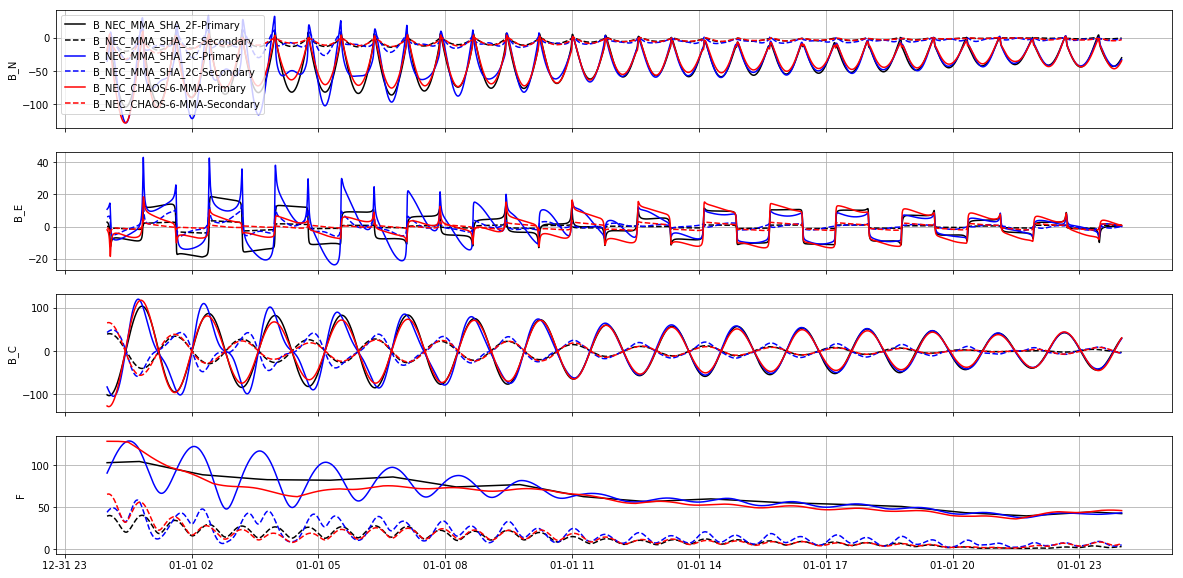

In [2]:
fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2F-Primary"][:,i], c='k')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2F-Secondary"][:,i], c='k', linestyle="--")
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2C-Primary"][:,i], c='b')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2C-Secondary"][:,i], c='b', linestyle="--")
    axes[i].plot(ds["Timestamp"], ds["B_NEC_CHAOS-6-MMA-Primary"][:,i], c='r')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_CHAOS-6-MMA-Secondary"][:,i], c='r', linestyle="--")
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();

axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2F-Primary"], c='k')
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2F-Secondary"], c='k', linestyle="--")
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2C-Primary"], c='b')
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2C-Secondary"], c='b', linestyle="--")
axes[3].plot(ds["Timestamp"], ds["F_CHAOS-6-MMA-Primary"], c='r')
axes[3].plot(ds["Timestamp"], ds["F_CHAOS-6-MMA-Secondary"], c='r', linestyle="--")
axes[3].set_ylabel("F")
axes[3].grid()

# Compare 2F, 2C, CHAOS data-(core+mma) residual values

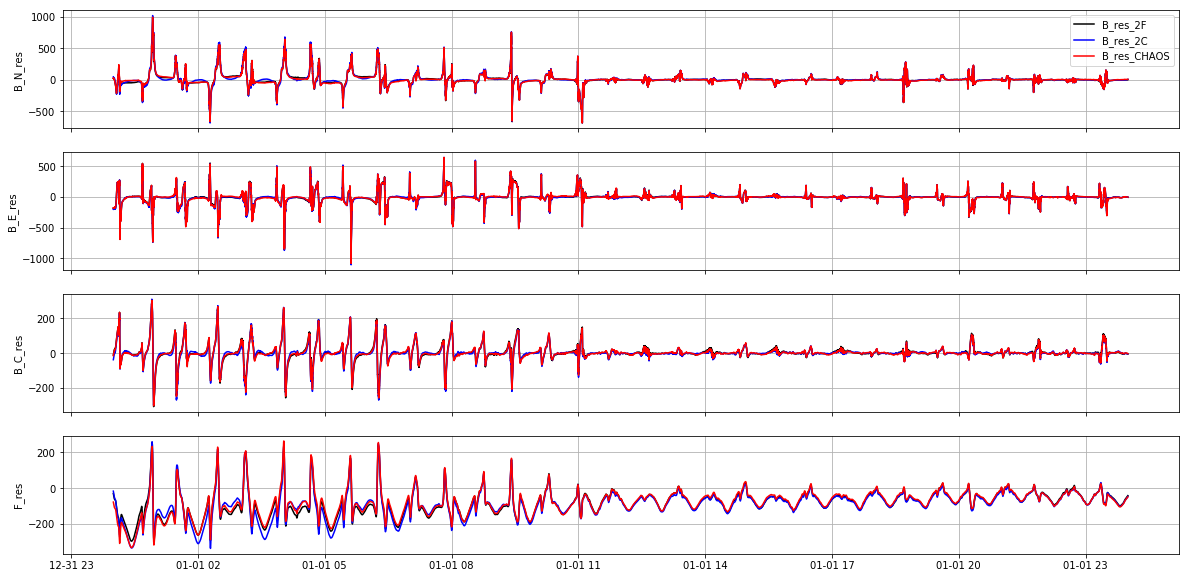

In [3]:
ds["B_res_2F"] = ds["B_NEC"] - ds["B_NEC_MCO_SHA_2F"] \
                             - ds["B_NEC_MMA_SHA_2F-Primary"] \
                             - ds["B_NEC_MMA_SHA_2F-Secondary"]

ds["F_res_2F"] = ds["F"] - ds["F_MCO_SHA_2F"] \
                             - ds["F_MMA_SHA_2F-Primary"] \
                             - ds["F_MMA_SHA_2F-Secondary"]

ds["B_res_2C"] = ds["B_NEC"] - ds["B_NEC_MCO_SHA_2C"] \
                             - ds["B_NEC_MMA_SHA_2C-Primary"] \
                             - ds["B_NEC_MMA_SHA_2C-Secondary"]

ds["F_res_2C"] = ds["F"] - ds["F_MCO_SHA_2C"] \
                             - ds["F_MMA_SHA_2C-Primary"] \
                             - ds["F_MMA_SHA_2C-Secondary"]

ds["B_res_CHAOS"] = ds["B_NEC"] - ds["B_NEC_CHAOS-6-Core"] \
                             - ds["B_NEC_CHAOS-6-MMA-Primary"] \
                             - ds["B_NEC_CHAOS-6-MMA-Secondary"]

ds["F_res_CHAOS"] = ds["F"] - ds["F_CHAOS-6-Core"] \
                             - ds["F_CHAOS-6-MMA-Primary"] \
                             - ds["F_CHAOS-6-MMA-Secondary"]

fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N_res', 'B_E_res', 'B_C_res']):
    axes[i].plot(ds["Timestamp"], ds["B_res_2F"][:,i], c='k')
    axes[i].plot(ds["Timestamp"], ds["B_res_2C"][:,i], c='b')
    axes[i].plot(ds["Timestamp"], ds["B_res_CHAOS"][:,i], c='r')
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();

axes[3].plot(ds["Timestamp"], ds["F_res_2F"], c='k')
axes[3].plot(ds["Timestamp"], ds["F_res_2C"], c='b')
axes[3].plot(ds["Timestamp"], ds["F_res_CHAOS"], c='r')
axes[3].set_ylabel("F_res")
axes[3].grid()



---

# Full Swarm-A time series of CHAOS_MMA at 1-minute sampling

In [27]:
request = SwarmRequest(url="https://staging.viresdisc.vires.services/openows")
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC", "F"],
                     models=["CHAOS-6-Combined",
                             "CHAOS-6-MMA-Primary",
                             "CHAOS-6-MMA-Secondary"],
                     sampling_step="PT1M")

ds_vir = request.get_between(start_time=dt.datetime(2013,1,1),
                                  end_time=dt.datetime(2019,1,1)).as_xarray()

[1/1] Processing:  100%|██████████|  [ Elapsed: 31:04, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:16, Remaining: 00:00 ] (410.487MB)


In [28]:
ds_vir

<xarray.Dataset>
Dimensions:                      (Timestamp: 2544710, dim: 3)
Coordinates:
  * Timestamp                    (Timestamp) datetime64[ns] 2013-11-25T11:02:52 ...
Dimensions without coordinates: dim
Data variables:
    Spacecraft                   (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' 'A' ...
    Latitude                     (Timestamp) float64 72.35 76.12 79.86 83.5 ...
    Longitude                    (Timestamp) float64 55.79 57.78 61.39 69.35 ...
    Radius                       (Timestamp) float64 6.862e+06 6.861e+06 ...
    B_NEC                        (Timestamp, dim) float64 6.309e+03 ...
    F                            (Timestamp) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    B_NEC_CHAOS-6-Combined       (Timestamp, dim) float64 6.314e+03 ...
    F_CHAOS-6-Combined           (Timestamp) float64 4.577e+04 4.599e+04 ...
    B_NEC_CHAOS-6-MMA-Primary    (Timestamp, dim) float64 -2.773 0.7111 ...
    F_CHAOS-6-MMA-Primary        (Timestamp) float64 12.91 12.97 13.02 13.0

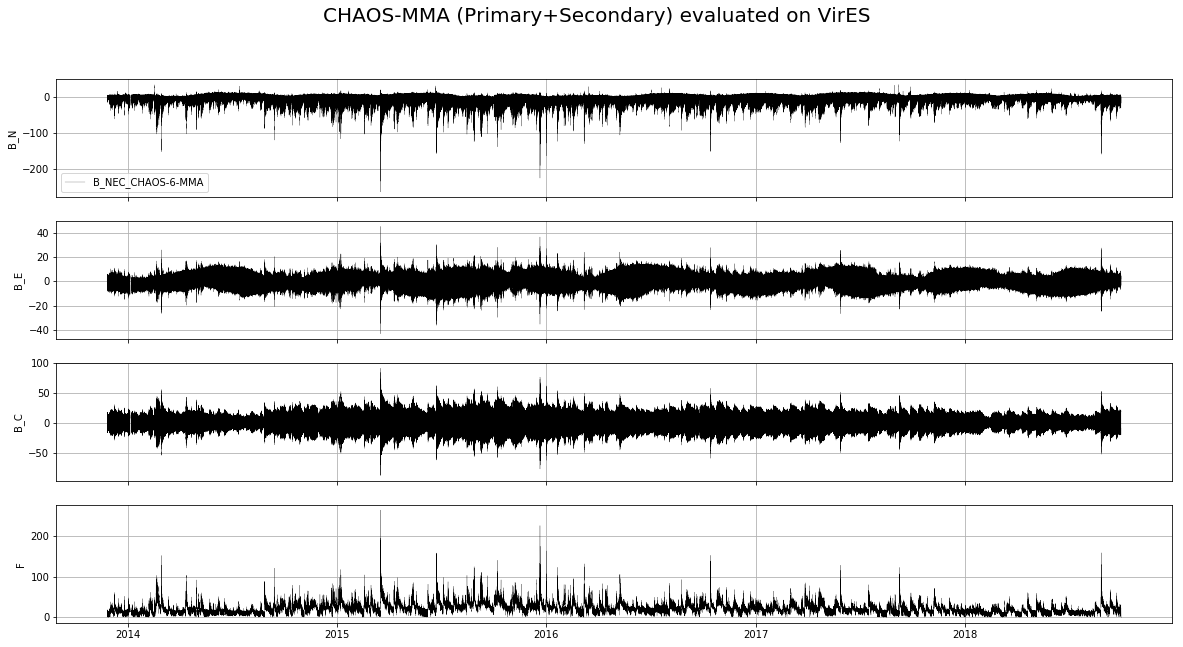

In [29]:
# Combined MMA = Primary + Secondary
ds_vir["B_NEC_CHAOS-6-MMA"] = ds_vir["B_NEC_CHAOS-6-MMA-Primary"] + ds_vir["B_NEC_CHAOS-6-MMA-Secondary"]
ds_vir["F_CHAOS-6-MMA"] = ("Timestamp", np.sqrt((ds_vir["B_NEC_CHAOS-6-MMA"]**2).sum(axis=1)).values)

fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds_vir["Timestamp"], ds_vir["B_NEC_CHAOS-6-MMA"][:,i], c='k', linewidth=0.2)
#     axes[i].plot(ds_mat["Timestamp"], ds_mat["B_NEC_CHAOS_MMA_MAT"][:,i], c='r', linestyle="--", linewidth=0.2, alpha=0.2)
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();
axes[3].plot(ds_vir["Timestamp"], ds_vir["F_CHAOS-6-MMA"], c='k', linewidth=0.2)
axes[3].set_ylabel("F")
axes[3].grid()
fig.suptitle("CHAOS-MMA (Primary+Secondary) evaluated on VirES", fontsize=20);

## Difference between VirES CHAOS-6-MMA and Matlab-evaluated

Load the model values that I have pre-calculated from the original CHAOS-6 matlab code

In [30]:
import xarray as xa
import numpy as np

ds_mat = xa.open_dataset("CHAOS_MMA_MATcode_SwA.nc")
# Add the intensity, F
ds_mat["F_CHAOS_MMA_MAT"] = ("Timestamp", np.sqrt((ds_mat["B_NEC_CHAOS_MMA_MAT"]**2).sum(axis=1)).values)
ds_mat

<xarray.Dataset>
Dimensions:              (Timestamp: 2543270, dim: 3)
Coordinates:
  * Timestamp            (Timestamp) datetime64[ns] 2013-11-25T11:02:52 ...
Dimensions without coordinates: dim
Data variables:
    Latitude             (Timestamp) float64 ...
    Longitude            (Timestamp) float64 ...
    OrbitNumber          (Timestamp) int64 ...
    Radius               (Timestamp) float64 ...
    Spacecraft           (Timestamp) object ...
    B_NEC_CHAOS_MMA_MAT  (Timestamp, dim) float64 -1.879 0.1135 17.04 -1.121 ...
    F_CHAOS_MMA_MAT      (Timestamp) float64 17.15 17.49 17.79 18.04 18.25 ...

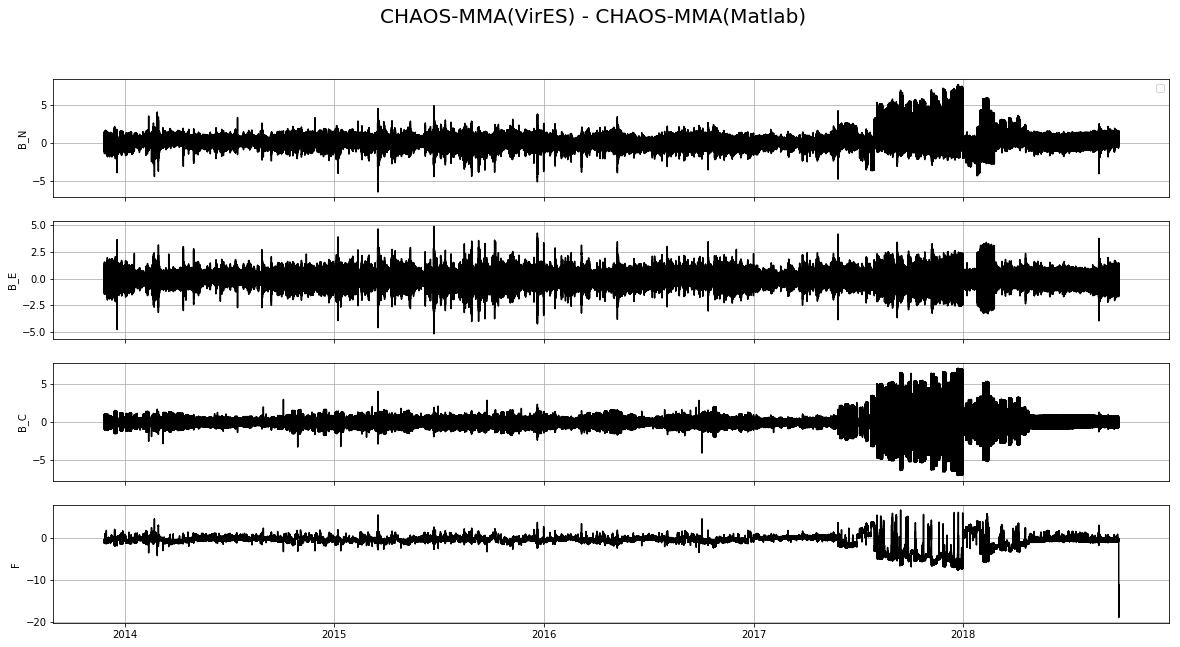

In [43]:
# Cut ds_vir to match the index of ds_mat
ds_vir = ds_vir.loc[{"Timestamp": ds_vir.indexes["Timestamp"] < '2018-09-30'}]

fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds_vir["Timestamp"], (ds_vir["B_NEC_CHAOS-6-MMA"][:,i]-ds_mat["B_NEC_CHAOS_MMA_MAT"][:,i]), c='k')
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();
axes[3].plot(ds_vir["Timestamp"], (ds_vir["F_CHAOS-6-MMA"]-ds_mat["F_CHAOS_MMA_MAT"]), c='k')
axes[3].set_ylabel("F")
axes[3].grid()
fig.suptitle("CHAOS-MMA(VirES) - CHAOS-MMA(Matlab)", fontsize=20);

## full CHAOS residuals (data - CHAOS-core-static-mma)

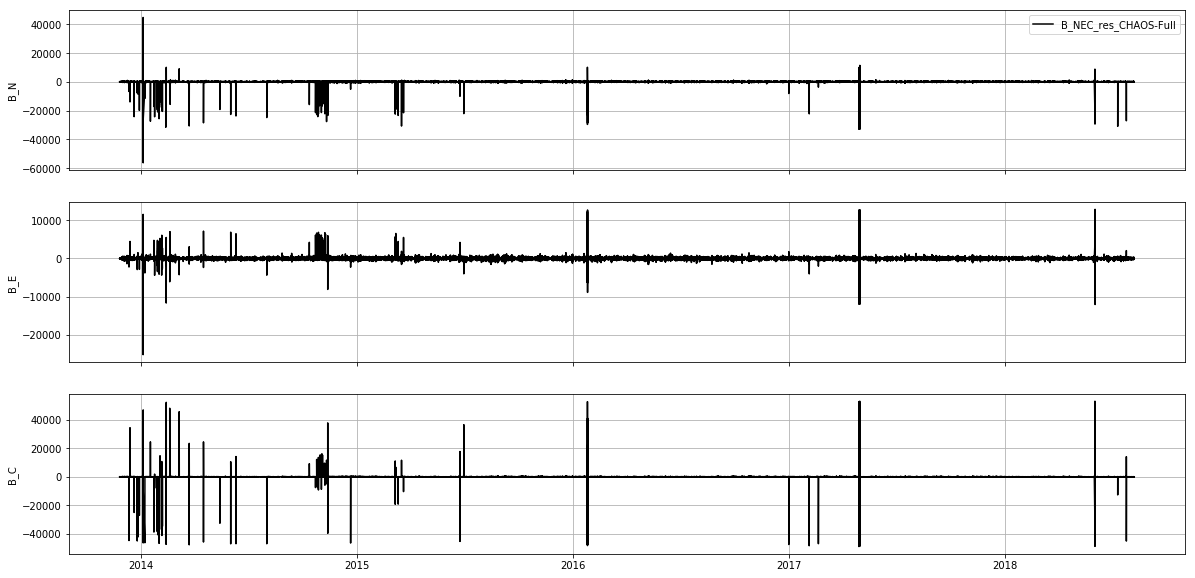

In [45]:
ds_vir["B_NEC_res_CHAOS-Full"] = ds_vir["B_NEC"] - ds_vir["B_NEC_CHAOS-6-Combined"] \
                                             - ds_vir["B_NEC_CHAOS-6-MMA"]

fig, axes = plt.subplots(figsize=(20,10), nrows=3, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds_vir["Timestamp"], ds_vir["B_NEC_res_CHAOS-Full"][:,i], c='k')
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();

Need to filter out these spikes (caused by bad data) - check Flags_F and Flags_B